In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head()

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


The zipcode data was downloaded from https://data.nashville.gov/General-Government/Zip-Codes/u7r5-bpku

In [3]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

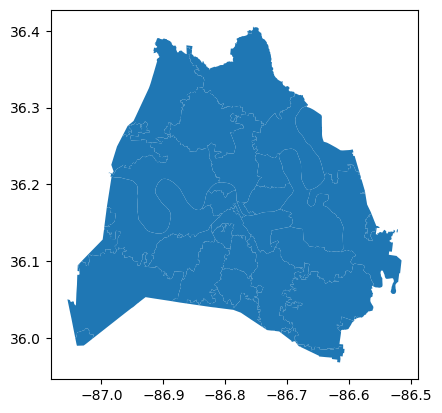

In [4]:
zipcodes.plot()

In [5]:
legend_kwd = {'title':'Zipcodes', 'loc':'upper left','bbox_to_anchor': (1,1.03), 'ncol':2}

<AxesSubplot:>

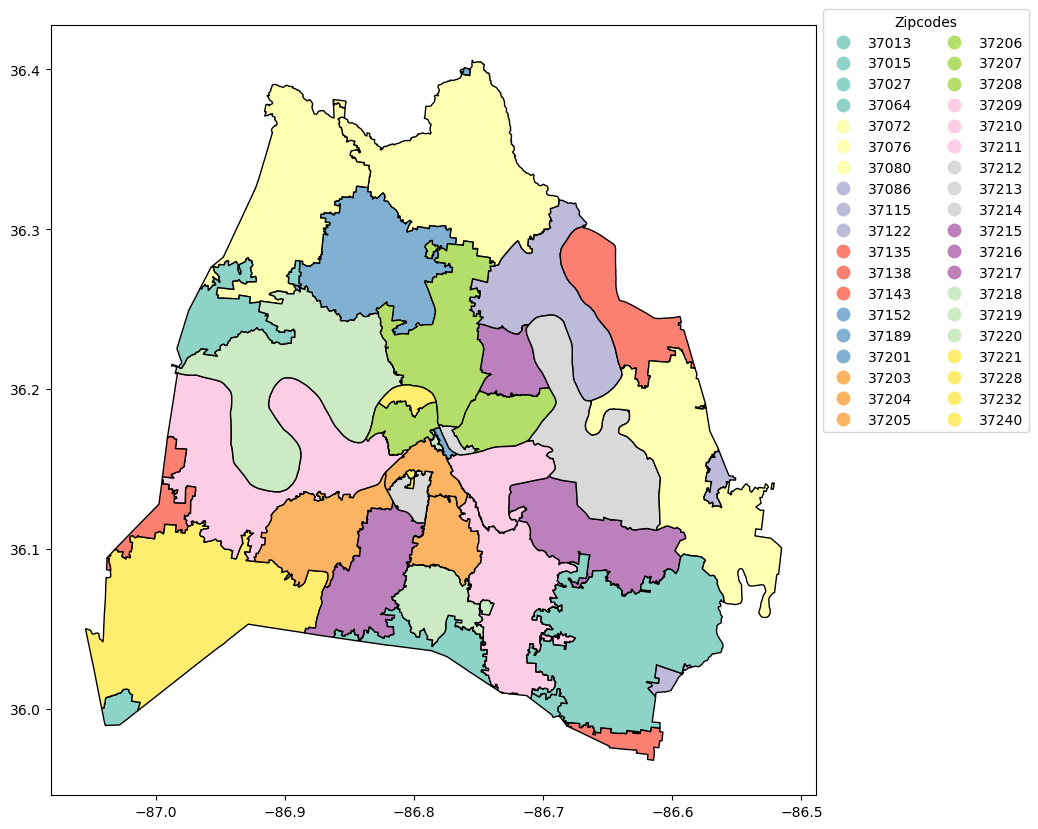

In [6]:
zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = legend_kwd,
              cmap = 'Set3')

In [7]:
mulb_trees = pd.read_csv('../data/bbw_map_003.csv')
mulb_trees

,Latitude,Longitude,Name,Note
0,36.185846,-86.738496,1,NaN
1,36.186073,-86.739592,2,NaN
2,36.184505,-86.737140,3,NaN
3,36.184061,-86.732654,4,NaN
4,36.179586,-86.738511,5,Blk Cantaloupe
...,...,...,...,...
218,36.190424,-86.696855,219,NaN
219,36.189909,-86.697538,220,NaN
220,36.187372,-86.700614,221,NaN
221,36.197774,-86.703022,222,NaN


In [8]:
mulb_trees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   223 non-null    float64
 1   Longitude  223 non-null    float64
 2   Name       223 non-null    int64  
 3   Note       9 non-null      object 
dtypes: float64(2), int64(1), object(1)
memory usage: 7.1+ KB


In [9]:
mulb_trees['geometry'] = mulb_trees.apply(lambda x: Point((float(x.Longitude),
                                                           float(x.Latitude))),
                                          axis=1)

In [10]:
mulb_trees.head()

,Latitude,Longitude,Name,Note,geometry
0,36.185846,-86.738496,1,NaN,POINT (-86.738496 36.185846)
1,36.186073,-86.739592,2,NaN,POINT (-86.739592 36.186073)
2,36.184505,-86.737140,3,NaN,POINT (-86.73714 36.184505)
3,36.184061,-86.732654,4,NaN,POINT (-86.732654 36.184061)
4,36.179586,-86.738511,5,Blk Cantaloupe,POINT (-86.738511 36.179586)


In [11]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
tree_geo = gpd.GeoDataFrame(mulb_trees,
                            crs = zipcodes.crs,
                            geometry = mulb_trees['geometry'])

In [13]:
type(tree_geo)

geopandas.geodataframe.GeoDataFrame

In [14]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [15]:
trees_by_zip = gpd.sjoin(tree_geo, zipcodes, op='within')

In [16]:
trees_by_zip.head()

,Latitude,Longitude,Name,Note,geometry,index_right,zip,po_name
0,36.185846,-86.738496,1,NaN,POINT (-86.73850 36.18585),13,37206,NASHVILLE
1,36.186073,-86.739592,2,NaN,POINT (-86.73959 36.18607),13,37206,NASHVILLE
2,36.184505,-86.737140,3,NaN,POINT (-86.73714 36.18451),13,37206,NASHVILLE
3,36.184061,-86.732654,4,NaN,POINT (-86.73265 36.18406),13,37206,NASHVILLE
4,36.179586,-86.738511,5,Blk Cantaloupe,POINT (-86.73851 36.17959),13,37206,NASHVILLE


In [17]:
trees_by_zip['zip'].value_counts()

37206    136
37207     45
37208     20
37204     12
37211      5
37210      4
37216      1
Name: zip, dtype: int64

In [18]:
trees_in_37206 = trees_by_zip.loc[trees_by_zip['zip'] == '37206']

In [19]:
polygon_37206 = zipcodes.loc[zipcodes['zip'] == '37206']

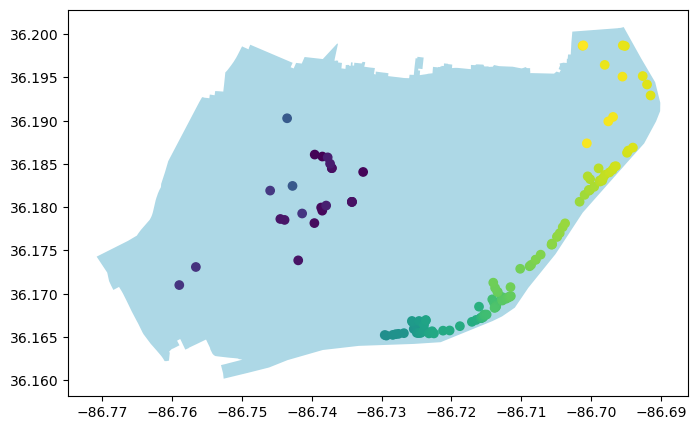

In [20]:
ax = polygon_37206.plot(figsize=(8,10), color='lightblue')
trees_in_37206.plot(ax = ax, column = 'Name')
plt.show()

In [21]:
trees_in_37206

,Latitude,Longitude,Name,Note,geometry,index_right,zip,po_name
0,36.185846,-86.738496,1,NaN,POINT (-86.73850 36.18585),13,37206,NASHVILLE
1,36.186073,-86.739592,2,NaN,POINT (-86.73959 36.18607),13,37206,NASHVILLE
2,36.184505,-86.737140,3,NaN,POINT (-86.73714 36.18451),13,37206,NASHVILLE
3,36.184061,-86.732654,4,NaN,POINT (-86.73265 36.18406),13,37206,NASHVILLE
4,36.179586,-86.738511,5,Blk Cantaloupe,POINT (-86.73851 36.17959),13,37206,NASHVILLE
...,...,...,...,...,...,...,...,...
217,36.195083,-86.695510,218,NaN,POINT (-86.69551 36.19508),13,37206,NASHVILLE
218,36.190424,-86.696855,219,NaN,POINT (-86.69686 36.19042),13,37206,NASHVILLE
219,36.189909,-86.697538,220,NaN,POINT (-86.69754 36.18991),13,37206,NASHVILLE
220,36.187372,-86.700614,221,NaN,POINT (-86.70061 36.18737),13,37206,NASHVILLE


In [22]:
polygon_37206.geometry.centroid

/tmp/ipykernel_27234/2818157926.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon_37206.geometry.centroid


13    POINT (-86.73098 36.18090)
dtype: geometry

In [23]:
center = polygon_37206.geometry.centroid[13]

/tmp/ipykernel_27234/3029734763.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon_37206.geometry.centroid[13]


In [24]:
area_center  = [center.y, center.x]

In [25]:
print(area_center)

[36.18089690922079, -86.7309830626016]


In [26]:
map_37206 = folium.Map(location= area_center, zoom_start= 13)

In [27]:
map_37206

In [28]:
i = 0
for row_index, row_values in trees_in_37206.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 0
values are:
 
Latitude                          36.185846
Longitude                        -86.738496
Name                                      1
Note                                    NaN
geometry       POINT (-86.738496 36.185846)
index_right                              13
zip                                   37206
po_name                           NASHVILLE
Name: 0, dtype: object
------------------------- 
index is 1
values are:
 
Latitude                          36.186073
Longitude                        -86.739592
Name                                      2
Note                                    NaN
geometry       POINT (-86.739592 36.186073)
index_right                              13
zip                                   37206
po_name                           NASHVILLE
Name: 1, dtype: object
------------------------- 
index is 2
values are:
 
Latitude                         36.184505
Longitude                        -86.73714
Name                               

In [29]:
folium.GeoJson(polygon_37206).add_to(map_37206)

In [30]:
for i, row in trees_in_37206.iterrows():
    loc= [row['Latitude'], row['Longitude']]
    pop= str(row['Name'])
    icon=folium.Icon(color='green', icon='tree', prefix='fa')
    
    marker = folium.Marker(
        location = loc,
        popup = pop, icon = icon)
    
    marker.add_to(map_37206)
#map_37206.save('../maps/treemap.html')

In [31]:
map_37206

In [32]:
cluster_37206 = folium.Map(location= area_center, zoom_start=12)

In [33]:
mrk_cluster = MarkerCluster().add_to(cluster_37206)
folium.GeoJson(polygon_37206).add_to(cluster_37206)

In [34]:
for i, row in trees_in_37206.iterrows():
    loc= [row['Latitude'], row['Longitude']]
    pop= str(row['Name'])
    icon=folium.Icon(color='green',icon='tree',prefix='fa')
    
    marker = folium.Marker(
        location = loc,
        popup = pop,
    icon = icon)
    
    marker.add_to(mrk_cluster)

In [35]:
#cluster_37206.save('../maps/cluster_37206')

In [36]:
cluster_37206
